In [1]:
pip install pandas matplotlib numpy neurokit2

   ---------------------------------------- 0.0/689.2 kB ? eta -:--:--
   ---------------------- ----------------- 389.1/689.2 kB 8.1 MB/s eta 0:00:01
   --------------------------------------- 689.2/689.2 kB 10.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


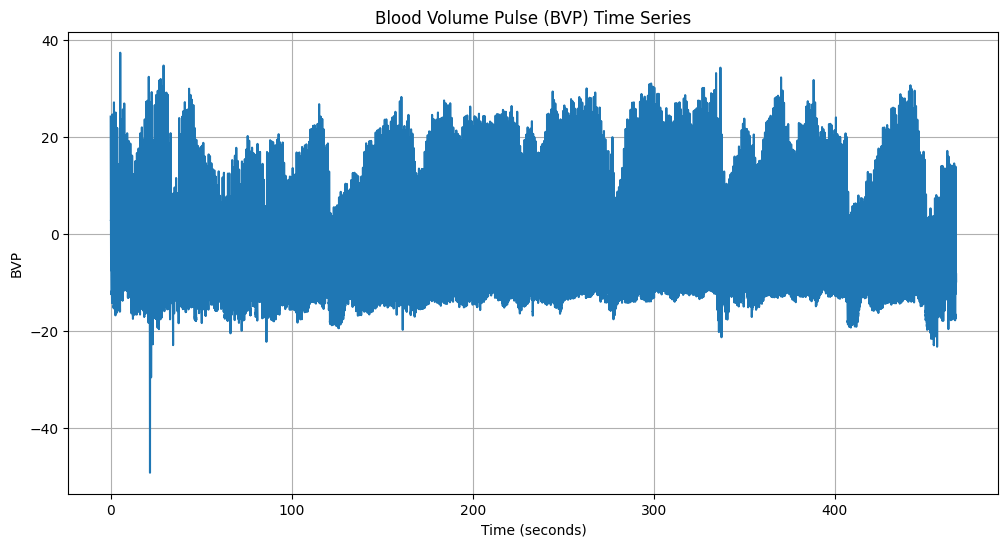

Available HRV metrics:
Index(['HRV_ULF', 'HRV_VLF', 'HRV_LF', 'HRV_HF', 'HRV_VHF', 'HRV_TP',
       'HRV_LFHF', 'HRV_LFn', 'HRV_HFn', 'HRV_LnHF'],
      dtype='object')
LF/HF ratio not found. Please check the available metrics and update the script accordingly.
HRV metrics saved to hrv_metrics_result.csv


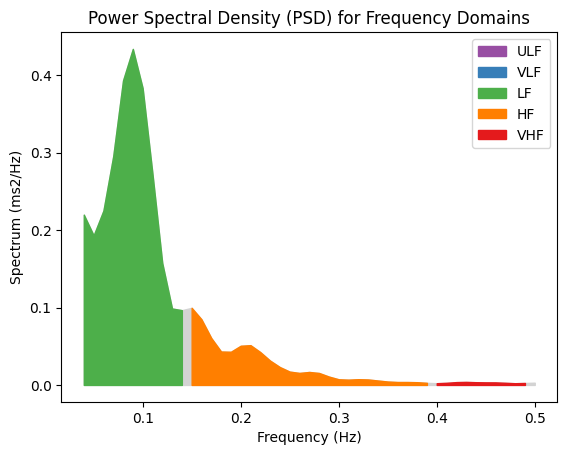

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import neurokit2 as nk

# Read the BVP data from CSV file
def read_bvp_data(file_path):
    df = pd.read_csv(file_path)
    return df['BVP'].values  # Assuming the column name is 'BVP'

# Visualize BVP time series
def visualize_bvp(bvp_data, sampling_rate):
    time = np.arange(len(bvp_data)) / sampling_rate
    plt.figure(figsize=(12, 6))
    plt.plot(time, bvp_data)
    plt.title('Blood Volume Pulse (BVP) Time Series')
    plt.xlabel('Time (seconds)')
    plt.ylabel('BVP')
    plt.grid(True)
    plt.show()

# Calculate HRV metrics
def calculate_hrv_metrics(bvp_data, sampling_rate):
    # Clean the BVP signal
    clean_bvp = nk.ppg_clean(bvp_data, sampling_rate=sampling_rate)
    
    # Find peaks in the BVP signal
    peaks, info = nk.ppg_peaks(clean_bvp, sampling_rate=sampling_rate)
    
    # Calculate HRV indices
    hrv_indices = nk.hrv_frequency(peaks, sampling_rate=sampling_rate, show=True)
    
    print("Available HRV metrics:")
    print(hrv_indices.columns)
    
    # Try to find LF/HF ratio
    lf_hf_ratio = None
    for column in hrv_indices.columns:
        if 'lf' in column.lower() and 'hf' in column.lower() and '/' in column:
            lf_hf_ratio = hrv_indices[column].values[0]
            print(f"Found LF/HF ratio in column: {column}")
            break
    
    if lf_hf_ratio is None:
        print("LF/HF ratio not found. Please check the available metrics and update the script accordingly.")
    
    return hrv_indices, lf_hf_ratio

# Save HRV metrics to CSV
def save_hrv_metrics_to_csv(hrv_indices, output_file):
    hrv_indices.to_csv(output_file, index=False)

# Main function
def main():
    input_file = 'C:/Users/thisi/OneDrive/共有ファイル/生体情報データ/SC_BVP_test2.csv'
    output_file = 'hrv_metrics_result.csv'
    sampling_rate = 128  # Hz

    # Read BVP data
    bvp_data = read_bvp_data(input_file)

    # Visualize BVP data
    visualize_bvp(bvp_data, sampling_rate)

    # Calculate HRV metrics
    hrv_indices, lf_hf_ratio = calculate_hrv_metrics(bvp_data, sampling_rate)
    
    if lf_hf_ratio is not None:
        print(f"LF/HF Ratio: {lf_hf_ratio}")

    # Save result to CSV
    save_hrv_metrics_to_csv(hrv_indices, output_file)
    print(f"HRV metrics saved to {output_file}")

if __name__ == "__main__":
    main()